In [1]:
# IMPORTS

import json
!pip3 install matplotlib
!pip3 install squarify
!python3 -m pip install plotly



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
DEPRECATION: carbonsh 0.0.9 has a non-standard dependency specifier pyppeteer>=0.2.2<1. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of carbonsh or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Di

# Fetch Hashtag Frequencies

In [2]:
# Opening JSON file
f = open('hashtag2_filtered.json')


# returns JSON object as a dictionary
data = json.load(f)
dict_hashtag_count = {}

# Iterating through the json list
for i in data:
    videos = i['value']['videos']
    for video in videos:
        hashtags = video['hashtag_names']

        for hashtag in hashtags:
            if hashtag not in dict_hashtag_count.keys():
                dict_hashtag_count[hashtag] = 1
            else:
                dict_hashtag_count[hashtag] += 1
                
dict_hashtag_count =  dict(sorted(dict_hashtag_count.items(), key=lambda item: item[1], reverse=True))
print(dict_hashtag_count)

# Closing file
f.close()

# The output was confusing to look at in the beginning due to right and left inversion. For hebrew words, key is on the right 
# and the value is on the left

{'עזה': 329, 'מלחמה': 201, 'ישראל': 107, 'פוריו': 92, 'חמאס': 60, 'foryou': 56, 'צהל': 53, 'חרבותברזל': 49, 'מלחמהבישראל': 45, 'fyp': 44, 'פוריוישראל': 44, 'israel': 42, 'מחבלים': 27, 'טילים': 27, 'חיילים': 21, 'gaza': 19, 'פוריועולמי': 16, 'חדשות': 16, 'חדשות12': 15, 'שדרות': 14, 'עוטףעזה': 14, 'fypシ': 14, 'דרום': 14, 'viral': 13, 'עםישראלחי': 13, 'ויראלי': 13, 'foryoupage': 12, 'war': 12, 'טרור': 12, 'עםישראלחייי🇮🇱': 10, 'n12': 10, 'חטופים': 9, 'עזהלאקיימת': 9, 'משיח': 9, 'אזעקות': 9, 'פוריוישראלי': 8, 'fypシ゚viral': 8, 'צבא': 8, 'צה״ל': 8, 'אמונה': 7, 'עםישראל': 7, 'fy': 7, 'אזעקה': 7, 'רקטות': 7, 'מבצע': 7, 'ישראלבמלחמה': 7, 'ביבי': 6, 'fup': 6, 'ממד': 6, 'אחדות': 6, 'tiktok': 5, 'israelunderfire': 5, 'capcut': 5, 'אופקים': 5, 'בארי': 5, 'מבצעצבאי': 5, 'ariel': 5, 'תעשו_לייק': 5, 'השתאג': 5, 'תעשו_עוקב': 5, 'אף_אחד_מימשה_אמרתי_לא_עולה_כסף': 5, 'אריאלכאן😘': 5, 'israel🇮🇱': 5, 'idf': 5, 'צבעאדום': 5, 'אהבתחינם': 5, 'שבויים': 5, 'גאולה': 5, 'חדשות13': 4, 'חרדה': 4, 'hamas': 4, 'מבצעחרבו

# Hashtag Frequency Visualization
I like the Sunburst visual more effective.

## TreeMap

/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127473 (\N{REGIONAL INDICATOR SYMBOL LETTER L}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12442 (\N{COMBINING KATAKANA-HIRAGANA SEMI-VOICED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


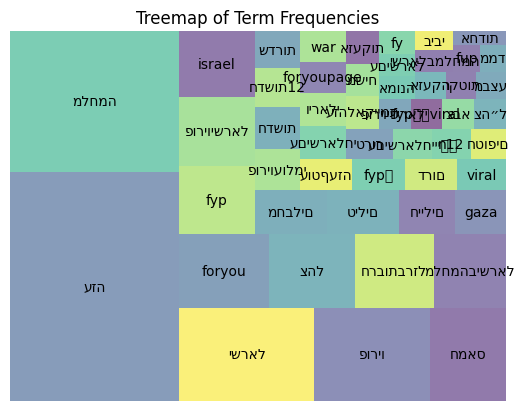

In [3]:
import matplotlib.pyplot as plt
import squarify

# Filter and sort the dictionary based on frequency
filtered_dict = {k: v for k, v in dict_hashtag_count.items() if v > 5}
sorted_dict = dict(sorted(filtered_dict.items(), key=lambda item: item[1], reverse=True))

# Extract sizes and labels from the filtered and sorted dictionary
sizes = list(sorted_dict.values())
labels = list(sorted_dict.keys())

# Scale sizes based on frequency distribution
total = sum(sizes)
sizes_scaled = [(size / total) * 100 for size in sizes]

# Generate treemap
squarify.plot(sizes=sizes_scaled, label=labels, alpha=0.6)

# Add title
plt.title("Treemap of Term Frequencies")

# Remove axis
plt.axis('off')

# Show plot
plt.show()


## Sunburst (Run to open in a separate tab)

In [5]:
import plotly.graph_objects as go

# Filter and sort the dictionary based on frequency
filtered_dict = {k: v for k, v in dict_hashtag_count.items() if v > 3}
sorted_dict = dict(sorted(filtered_dict.items(), key=lambda item: item[1], reverse=True))

# Extract sizes and labels from the filtered and sorted dictionary
sizes = list(sorted_dict.values())
labels = list(sorted_dict.keys())

# Create sunburst chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=[''] * len(labels),  # Set all categories as children of the root
    values=sizes,
))

# Update layout
fig.update_layout(
    title="Sunburst Chart of Term Frequencies",
    margin=dict(t=10, l=10, r=10, b=10),
)

# Show plot
fig.show(renderer="browser") # renders on a different tab because not being rendered here
# attached an output below


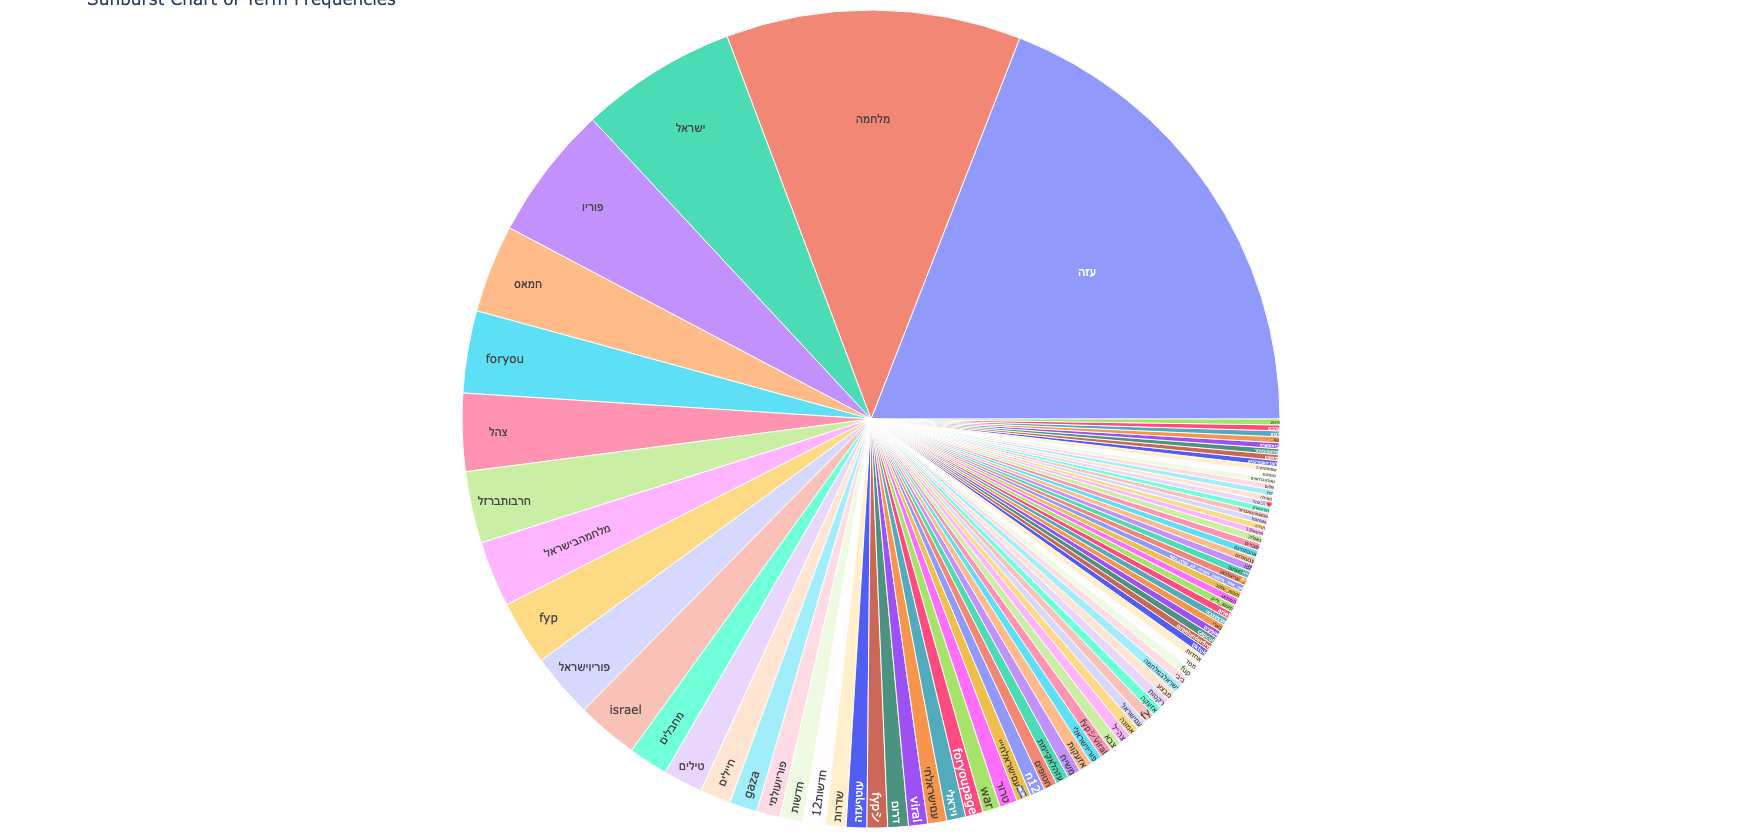

# HELP NEEDED: Translate Hashtags to English

In [ ]:
!pip3 cache purge
!python3 -m pip install googletrans

In [ ]:
from googletrans import Translator, LANGUAGES
translator = Translator()
translated_dict_hashtag_count = {}

for hashtag in dict_hashtag_count.keys():
    # Detect the language of the text
    translation = translator.translate(hashtag).text
    print(translation)

    if translation not in translated_dict_hashtag_count.keys():
            translated_dict_hashtag_count[translation] = 1
    else:
        translated_dict_hashtag_count[translation] += 1

print(translated_dict_hashtag_count)

In [ ]:
# Visualize the Sunburst chart with translated labels

import plotly.graph_objects as go

# Filter and sort the dictionary based on frequency
filtered_dict = {k: v for k, v in translated_dict_hashtag_count.items() if v > 3}
sorted_dict = dict(sorted(filtered_dict.items(), key=lambda item: item[1], reverse=True))

# Extract sizes and labels from the filtered and sorted dictionary
sizes = list(sorted_dict.values())
labels = list(sorted_dict.keys())

# Create sunburst chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=[''] * len(labels),  # Set all categories as children of the root
    values=sizes,
))

# Update layout
fig.update_layout(
    title="Sunburst Chart of Term Frequencies",
    margin=dict(t=10, l=10, r=10, b=10),
)

# Show plot
fig.show(renderer="browser") # renders on a different tab because not being rendered here
# attached an output below